In [1]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from skimage import io, img_as_ubyte
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preproc

import seaborn as sns

In [2]:
# Globals
_SEED = 0

In [3]:
# Set the paths for image files, labels etc
faces_path = "../data/Faces/"
labels_path = "../data/labels.csv"
names_path = "../data/filenames.txt"

In [4]:
# Read labels as pandas object from labels.csv
labels_columns = ['age', 'gender', 'race']
labels = pd.read_csv(labels_path)
labels = pd.DataFrame(data=labels.values, columns=labels_columns)

In [5]:
# filter labels
def filter_by_age(df, fromAge, toAge):
    return df[(df.age >= fromAge) & (df.age <=toAge)]

In [10]:
filtered_labels = filter_by_age(labels, 15, 30)

In [11]:
filtered_labels

,age,gender,race
620,15,0,0
621,15,0,0
622,15,0,0
623,15,0,0
624,15,0,0
...,...,...,...
11230,30,1,4
11231,30,1,4
11232,30,1,4
11233,30,1,4


In [12]:
# Open a random image to get dimensions
test_img_name = 0
test_img = io.imread(faces_path+f"{test_img_name}.jpg", as_gray=True)
h, w = test_img.shape
del test_img

In [13]:
X = np.empty((len(filtered_labels), h*w))

for i, index in enumerate(filtered_labels.index):
    print(i,index)
    a = io.imread(faces_path+f"{index}.jpg", as_gray=True)
    a = img_as_ubyte(a)
    X[i, :] = a.reshape(1, -1)
    
del a
print('Done loading images')

0 620
1 621
2 622
3 623
4 624
5 625
6 626
7 627
8 628
9 629
10 630
11 631
12 632
13 633
14 634
15 635
16 636
17 637
18 638
19 639
20 640
21 641
22 642
23 643
24 644
25 645
26 646
27 647
28 648
29 649
30 650
31 651
32 652
33 653
34 654
35 655
36 656
37 657
38 658
39 659
40 660
41 661
42 662
43 663
44 664
45 665
46 666
47 667
48 668
49 669
50 670
51 671
52 672
53 673
54 674
55 675
56 676
57 677
58 678
59 679
60 680
61 681
62 682
63 683
64 684
65 685
66 686
67 687
68 688
69 689
70 690
71 691
72 692
73 693
74 694
75 695
76 696
77 697
78 698
79 699
80 700
81 701
82 702
83 703
84 704
85 705
86 706
87 707
88 708
89 709
90 710
91 711
92 712
93 713
94 714
95 715
96 716
97 717
98 718
99 719
100 720
101 721
102 722
103 723
104 724
105 725
106 726
107 727
108 728
109 729
110 730
111 731
112 732
113 733
114 734
115 735
116 736
117 737
118 738
119 739
120 740
121 741
122 742
123 743
124 744
125 745
126 746
127 747
128 748
129 749
130 750
131 751
132 752
133 753
134 754
135 755
136 756
137 757
138 75

1046 2789
1047 2790
1048 2791
1049 2792
1050 2793
1051 2794
1052 2795
1053 2796
1054 2797
1055 2798
1056 2799
1057 2800
1058 2801
1059 2802
1060 2803
1061 2804
1062 2805
1063 2806
1064 2807
1065 2808
1066 2809
1067 2810
1068 2811
1069 2812
1070 2813
1071 2814
1072 2815
1073 2816
1074 2817
1075 2818
1076 2819
1077 2820
1078 2821
1079 2822
1080 2823
1081 2824
1082 2825
1083 2826
1084 2827
1085 2828
1086 2829
1087 2830
1088 2831
1089 2832
1090 2833
1091 2834
1092 2835
1093 2836
1094 2837
1095 2838
1096 2839
1097 2840
1098 2841
1099 2842
1100 2843
1101 2844
1102 2845
1103 2846
1104 2847
1105 2848
1106 2849
1107 2850
1108 2851
1109 2852
1110 2853
1111 2854
1112 2855
1113 2856
1114 2857
1115 2858
1116 2859
1117 2860
1118 2861
1119 2862
1120 2863
1121 2864
1122 2865
1123 2866
1124 2867
1125 2868
1126 2869
1127 2870
1128 2871
1129 2872
1130 2873
1131 2874
1132 2875
1133 2876
1134 2877
1135 2878
1136 2879
1137 2880
1138 2881
1139 2882
1140 2883
1141 2884
1142 2885
1143 2886
1144 2887
1145 2888


1883 3626
1884 3627
1885 3628
1886 3629
1887 3630
1888 3631
1889 3632
1890 3633
1891 3634
1892 3635
1893 3636
1894 3637
1895 3638
1896 3639
1897 3640
1898 3641
1899 3642
1900 3643
1901 3644
1902 3645
1903 3646
1904 3647
1905 3648
1906 3649
1907 3650
1908 3651
1909 3652
1910 3653
1911 3654
1912 3655
1913 3656
1914 3657
1915 3658
1916 3659
1917 3660
1918 3661
1919 3662
1920 3663
1921 3664
1922 3665
1923 3666
1924 3667
1925 3668
1926 3669
1927 3670
1928 3671
1929 3672
1930 3673
1931 3674
1932 3675
1933 3676
1934 3677
1935 3678
1936 3679
1937 3680
1938 3681
1939 3682
1940 3683
1941 3684
1942 3685
1943 3686
1944 3687
1945 3688
1946 3689
1947 3690
1948 3691
1949 3692
1950 3693
1951 3694
1952 3695
1953 3696
1954 3697
1955 3698
1956 3699
1957 3700
1958 3701
1959 3702
1960 3703
1961 3704
1962 3705
1963 3706
1964 3707
1965 3708
1966 3709
1967 3710
1968 3711
1969 3712
1970 3713
1971 3714
1972 3715
1973 3716
1974 3717
1975 3718
1976 3719
1977 3720
1978 3721
1979 3722
1980 3723
1981 3724
1982 3725


2768 4511
2769 4512
2770 4513
2771 4514
2772 4515
2773 4516
2774 4517
2775 4518
2776 4519
2777 4520
2778 4521
2779 4522
2780 4523
2781 4524
2782 4525
2783 4526
2784 4527
2785 4528
2786 4529
2787 4530
2788 4531
2789 4532
2790 4533
2791 4534
2792 4535
2793 4536
2794 4537
2795 4538
2796 4539
2797 4540
2798 4541
2799 4542
2800 4543
2801 4544
2802 4545
2803 4546
2804 4547
2805 4548
2806 4549
2807 4550
2808 4551
2809 4552
2810 4553
2811 4554
2812 4555
2813 4556
2814 4557
2815 4558
2816 4559
2817 4560
2818 4561
2819 4562
2820 4563
2821 4564
2822 4565
2823 4566
2824 4567
2825 4568
2826 4569
2827 4570
2828 4571
2829 4572
2830 4573
2831 4574
2832 4575
2833 4576
2834 4577
2835 4578
2836 4579
2837 4580
2838 4581
2839 4582
2840 4583
2841 4584
2842 4585
2843 4586
2844 4587
2845 4588
2846 4589
2847 4590
2848 4591
2849 4592
2850 4593
2851 4594
2852 4595
2853 4596
2854 4597
2855 4598
2856 4599
2857 4600
2858 4601
2859 4602
2860 4603
2861 4604
2862 4605
2863 4606
2864 4607
2865 4608
2866 4609
2867 4610


3657 5400
3658 5401
3659 5402
3660 5403
3661 5404
3662 5405
3663 5406
3664 5407
3665 5408
3666 5409
3667 5410
3668 5411
3669 5412
3670 5413
3671 5414
3672 5415
3673 5416
3674 5417
3675 5418
3676 5419
3677 5420
3678 5421
3679 5422
3680 5423
3681 5424
3682 5425
3683 5426
3684 5427
3685 5428
3686 5429
3687 5430
3688 5431
3689 5432
3690 5433
3691 5434
3692 5435
3693 5436
3694 5437
3695 5438
3696 5439
3697 5440
3698 5441
3699 5442
3700 5443
3701 5444
3702 5445
3703 5446
3704 5447
3705 5448
3706 5449
3707 5450
3708 5451
3709 5452
3710 5453
3711 5454
3712 5455
3713 5456
3714 5457
3715 5458
3716 5459
3717 5460
3718 5461
3719 5462
3720 5463
3721 5464
3722 5465
3723 5466
3724 5467
3725 5468
3726 5469
3727 5470
3728 5471
3729 5472
3730 5473
3731 5474
3732 5475
3733 5476
3734 5477
3735 5478
3736 5479
3737 5480
3738 5481
3739 5482
3740 5483
3741 5484
3742 5485
3743 5486
3744 5487
3745 5488
3746 5489
3747 5490
3748 5491
3749 5492
3750 5493
3751 5494
3752 5495
3753 5496
3754 5497
3755 5498
3756 5499


4537 6280
4538 6281
4539 6282
4540 6283
4541 6284
4542 6285
4543 6286
4544 6287
4545 6288
4546 6289
4547 6290
4548 6291
4549 6292
4550 6293
4551 6294
4552 6295
4553 6296
4554 6297
4555 6298
4556 6299
4557 6300
4558 6301
4559 6302
4560 6303
4561 6304
4562 6305
4563 6306
4564 6307
4565 6308
4566 6309
4567 6310
4568 6311
4569 6312
4570 6313
4571 6314
4572 6315
4573 6316
4574 6317
4575 6318
4576 6319
4577 6320
4578 6321
4579 6322
4580 6323
4581 6324
4582 6325
4583 6326
4584 6327
4585 6328
4586 6329
4587 6330
4588 6331
4589 6332
4590 6333
4591 6334
4592 6335
4593 6336
4594 6337
4595 6338
4596 6339
4597 6340
4598 6341
4599 6342
4600 6343
4601 6344
4602 6345
4603 6346
4604 6347
4605 6348
4606 6349
4607 6350
4608 6351
4609 6352
4610 6353
4611 6354
4612 6355
4613 6356
4614 6357
4615 6358
4616 6359
4617 6360
4618 6361
4619 6362
4620 6363
4621 6364
4622 6365
4623 6366
4624 6367
4625 6368
4626 6369
4627 6370
4628 6371
4629 6372
4630 6373
4631 6374
4632 6375
4633 6376
4634 6377
4635 6378
4636 6379


5454 7197
5455 7198
5456 7199
5457 7200
5458 7201
5459 7202
5460 7203
5461 7204
5462 7205
5463 7206
5464 7207
5465 7208
5466 7209
5467 7210
5468 7211
5469 7212
5470 7213
5471 7214
5472 7215
5473 7216
5474 7217
5475 7218
5476 7219
5477 7220
5478 7221
5479 7222
5480 7223
5481 7224
5482 7225
5483 7226
5484 7227
5485 7228
5486 7229
5487 7230
5488 7231
5489 7232
5490 7233
5491 7234
5492 7235
5493 7236
5494 7237
5495 7238
5496 7239
5497 7240
5498 7241
5499 7242
5500 7243
5501 7244
5502 7245
5503 7246
5504 7247
5505 7248
5506 7249
5507 7250
5508 7251
5509 7252
5510 7253
5511 7254
5512 7255
5513 7256
5514 7257
5515 7258
5516 7259
5517 7260
5518 7261
5519 7262
5520 7263
5521 7264
5522 7265
5523 7266
5524 7267
5525 7268
5526 7269
5527 7270
5528 7271
5529 7272
5530 7273
5531 7274
5532 7275
5533 7276
5534 7277
5535 7278
5536 7279
5537 7280
5538 7281
5539 7282
5540 7283
5541 7284
5542 7285
5543 7286
5544 7287
5545 7288
5546 7289
5547 7290
5548 7291
5549 7292
5550 7293
5551 7294
5552 7295
5553 7296


6288 8031
6289 8032
6290 8033
6291 8034
6292 8035
6293 8036
6294 8037
6295 8038
6296 8039
6297 8040
6298 8041
6299 8042
6300 8043
6301 8044
6302 8045
6303 8046
6304 8047
6305 8048
6306 8049
6307 8050
6308 8051
6309 8052
6310 8053
6311 8054
6312 8055
6313 8056
6314 8057
6315 8058
6316 8059
6317 8060
6318 8061
6319 8062
6320 8063
6321 8064
6322 8065
6323 8066
6324 8067
6325 8068
6326 8069
6327 8070
6328 8071
6329 8072
6330 8073
6331 8074
6332 8075
6333 8076
6334 8077
6335 8078
6336 8079
6337 8080
6338 8081
6339 8082
6340 8083
6341 8084
6342 8085
6343 8086
6344 8087
6345 8088
6346 8089
6347 8090
6348 8091
6349 8092
6350 8093
6351 8094
6352 8095
6353 8096
6354 8097
6355 8098
6356 8099
6357 8100
6358 8101
6359 8102
6360 8103
6361 8104
6362 8105
6363 8106
6364 8107
6365 8108
6366 8109
6367 8110
6368 8111
6369 8112
6370 8113
6371 8114
6372 8115
6373 8116
6374 8117
6375 8118
6376 8119
6377 8120
6378 8121
6379 8122
6380 8123
6381 8124
6382 8125
6383 8126
6384 8127
6385 8128
6386 8129
6387 8130


7123 8866
7124 8867
7125 8868
7126 8869
7127 8870
7128 8871
7129 8872
7130 8873
7131 8874
7132 8875
7133 8876
7134 8877
7135 8878
7136 8879
7137 8880
7138 8881
7139 8882
7140 8883
7141 8884
7142 8885
7143 8886
7144 8887
7145 8888
7146 8889
7147 8890
7148 8891
7149 8892
7150 8893
7151 8894
7152 8895
7153 8896
7154 8897
7155 8898
7156 8899
7157 8900
7158 8901
7159 8902
7160 8903
7161 8904
7162 8905
7163 8906
7164 8907
7165 8908
7166 8909
7167 8910
7168 8911
7169 8912
7170 8913
7171 8914
7172 8915
7173 8916
7174 8917
7175 8918
7176 8919
7177 8920
7178 8921
7179 8922
7180 8923
7181 8924
7182 8925
7183 8926
7184 8927
7185 8928
7186 8929
7187 8930
7188 8931
7189 8932
7190 8933
7191 8934
7192 8935
7193 8936
7194 8937
7195 8938
7196 8939
7197 8940
7198 8941
7199 8942
7200 8943
7201 8944
7202 8945
7203 8946
7204 8947
7205 8948
7206 8949
7207 8950
7208 8951
7209 8952
7210 8953
7211 8954
7212 8955
7213 8956
7214 8957
7215 8958
7216 8959
7217 8960
7218 8961
7219 8962
7220 8963
7221 8964
7222 8965


8001 9744
8002 9745
8003 9746
8004 9747
8005 9748
8006 9749
8007 9750
8008 9751
8009 9752
8010 9753
8011 9754
8012 9755
8013 9756
8014 9757
8015 9758
8016 9759
8017 9760
8018 9761
8019 9762
8020 9763
8021 9764
8022 9765
8023 9766
8024 9767
8025 9768
8026 9769
8027 9770
8028 9771
8029 9772
8030 9773
8031 9774
8032 9775
8033 9776
8034 9777
8035 9778
8036 9779
8037 9780
8038 9781
8039 9782
8040 9783
8041 9784
8042 9785
8043 9786
8044 9787
8045 9788
8046 9789
8047 9790
8048 9791
8049 9792
8050 9793
8051 9794
8052 9795
8053 9796
8054 9797
8055 9798
8056 9799
8057 9800
8058 9801
8059 9802
8060 9803
8061 9804
8062 9805
8063 9806
8064 9807
8065 9808
8066 9809
8067 9810
8068 9811
8069 9812
8070 9813
8071 9814
8072 9815
8073 9816
8074 9817
8075 9818
8076 9819
8077 9820
8078 9821
8079 9822
8080 9823
8081 9824
8082 9825
8083 9826
8084 9827
8085 9828
8086 9829
8087 9830
8088 9831
8089 9832
8090 9833
8091 9834
8092 9835
8093 9836
8094 9837
8095 9838
8096 9839
8097 9840
8098 9841
8099 9842
8100 9843


8778 11003
8779 11004
8780 11005
8781 11006
8782 11007
8783 11008
8784 11009
8785 11010
8786 11011
8787 11012
8788 11013
8789 11014
8790 11015
8791 11016
8792 11017
8793 11018
8794 11019
8795 11020
8796 11021
8797 11022
8798 11023
8799 11024
8800 11025
8801 11026
8802 11027
8803 11028
8804 11029
8805 11030
8806 11031
8807 11032
8808 11033
8809 11034
8810 11035
8811 11036
8812 11037
8813 11038
8814 11039
8815 11040
8816 11041
8817 11042
8818 11043
8819 11044
8820 11045
8821 11046
8822 11047
8823 11048
8824 11049
8825 11050
8826 11051
8827 11052
8828 11053
8829 11054
8830 11055
8831 11056
8832 11057
8833 11058
8834 11059
8835 11060
8836 11061
8837 11062
8838 11063
8839 11064
8840 11065
8841 11066
8842 11067
8843 11068
8844 11069
8845 11070
8846 11071
8847 11072
8848 11073
8849 11074
8850 11075
8851 11076
8852 11077
8853 11078
8854 11079
8855 11080
8856 11081
8857 11082
8858 11083
8859 11084
8860 11085
8861 11086
8862 11087
8863 11088
8864 11089
8865 11090
8866 11091
8867 11092
8868 11093

In [14]:
X

array([[ 31.,  27.,  24., ...,  43.,  44.,  45.],
       [ 37.,  34.,  29., ..., 180., 180., 180.],
       [114.,  45.,  15., ..., 221., 221., 221.],
       ...,
       [  1.,   1.,   1., ...,   0.,   0.,   0.],
       [ 17.,  18.,  20., ...,  27.,  33.,  37.],
       [ 96.,  93.,  88., ...,  90.,  53.,  24.]])

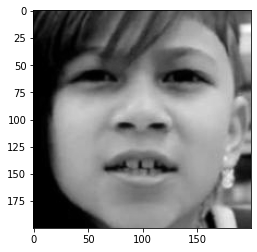

In [16]:
plt.imshow((X[0,:]).reshape(h,w), cmap='gray')

## NMF

In [ ]:
# Create model init method is set to random
# model = decomposition.NMF(n_components=n_components, init='random', random_state=0)
# X_train_transformed = model.fit_transform(Xtrain)
# L = 0.5*model.reconstruction_err_**2
# components = model.components_

# knn.fit(X_train_transformed,ytrain)
# acc = knn.score(model.transform(Xtest),ytest)
# X_test_hat = model.transform(Xtest).dot(model.components_)